In [1]:
from IPython.display import display, IFrame, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib          import rc 
from matplotlib          import cm

import sympy as sym

from scipy.stats import chi2
import scipy.optimize as spo

import pandas as pd
import corner

import os
import os.path as path
import wget

import emcee

from tqdm import tqdm

from scipy.integrate import dblquad
from scipy.integrate import quad

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Rotacion.csv'
url ='https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [3]:
data = pd.read_csv(Path_)
data

,h,angle,y,sigmay
0,10.0,10.0,0.0017,0.0015
1,20.0,10.0,0.0016,0.0015
2,30.0,10.0,0.0027,0.0015
3,40.0,10.0,0.0055,0.0015
4,50.0,10.0,0.0083,0.0015
5,60.0,10.0,0.0085,0.0015
6,70.0,10.0,0.0096,0.0015
7,80.0,10.0,0.0144,0.0015
8,90.0,10.0,0.0200,0.0015
9,100.0,10.0,0.0208,0.0015


In [4]:
h = data.h
DataF = data.loc[data['angle'] == 30]
DataF

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


In [5]:
H = DataF.h
Theta = DataF.angle
Y = DataF.y
Sigma = DataF.sigmay

In [6]:
def Model(p,lambday, h, g):
    return np.sqrt(8)/3 * p * np.cos(lambday*np.pi/180)*np.sqrt(h**3/g)  

In [7]:
def Chi2(p,h,y,sigmay,angle,g):
    return np.sum ((y-Model(p,angle,h,g))**2/(2*sigmay**2))

In [8]:
p0 = 1
p0

1

In [9]:
nll = lambda *p: Chi2(*p)

In [10]:
result = spo.minimize( nll, p0, args=(H,Y,Sigma,Theta,9.8),options={'disp':True} )

         Current function value: 1.145718
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30


In [11]:
bestparam = result.x
bestparam

array([7.24030783e-05])

20    0.000597
21    0.001689
22    0.003103
23    0.004777
24    0.006677
25    0.008777
26    0.011060
27    0.013512
28    0.016124
29    0.018884
dtype: float64


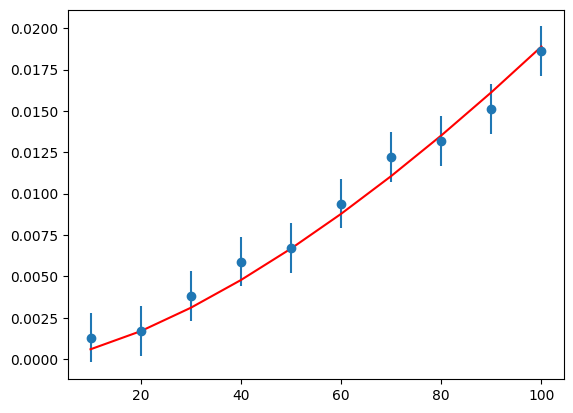

In [12]:
_x = np.linspace(np.min(H),np.max(H),10)
_y = Model(bestparam,Theta,H,9.8)
print(_y)
plt.errorbar(H,Y,yerr=Sigma,fmt='o')
plt.plot(_x,_y,color='r')

In [13]:
N = 300
Gravedad = np.zeros(N)

In [14]:
for i in range(N):
    Gravedad[i] = 9.81 + np.random.normal(loc=0, scale=1)

In [15]:
Gravedad

array([ 6.97213013, 10.06393513, 11.10665004, 11.24469731, 10.92536504,
        9.24332708,  9.25786349,  9.86949213, 10.37443017,  9.65634306,
       10.72494065,  9.95454344,  9.43403688, 10.85593926,  9.07712762,
        8.83446643, 11.1862412 ,  8.532907  , 11.83802835,  9.04588248,
       10.92112963,  8.81451143, 10.14337902,  9.13842229,  9.46629393,
        9.10068025, 11.22405421, 10.02062946,  9.84394729,  8.6017573 ,
        9.20892865, 10.87055771,  9.35758988,  9.67483196, 10.51028632,
        8.6492948 ,  9.1995563 ,  9.72081375,  8.67660976,  9.01341918,
        9.52029549, 10.36482536,  9.04507969, 10.61601389, 10.12277725,
        9.00630457,  9.25106733,  8.88659695,  9.61528   ,  8.38642992,
       11.07540716, 11.25302538, 10.19178307,  9.96903544,  8.80437535,
        9.06543087, 10.58344275, 11.02590127, 10.7200177 , 10.09641539,
       10.74812862, 10.84910976,  8.20478462, 10.20697414,  9.35265302,
       11.09975645, 11.40187608, 11.14949049,  9.92317158,  9.47

In [16]:
samples = np.zeros(10)
Yarr = Y.values
Sigmarr = Sigma.values
def NewSample(Y,S):
    M = len(Y)
    Sample = np.zeros(M)
    for j in range(M):
        Sample[j] = Y[j] + np.random.normal(loc=0, scale=S[0], size=1)
    return Sample
NewSample(Yarr, Sigmarr)

array([0.00181657, 0.00286054, 0.00332167, 0.00509773, 0.00512591,
       0.00999714, 0.01205747, 0.01389315, 0.01461248, 0.0175878 ])

In [17]:
Harr = H.values
Thetarr = Theta.values

Optimizacion 

In [18]:
p0 = 1

In [19]:
def Omega(H,Y,Sigma,Theta,Gravedad):
    Omega = np.zeros(300)
    for k in range(300):
        g = Gravedad[k]
        Sample = NewSample(Yarr, Sigmarr)
        result = spo.minimize(nll, p0, args=(Harr,Sample,Sigmarr,Thetarr,g),options={'disp':True})
        Omega[k] = result.x
    return Omega
omega = Omega(Harr,Yarr,Sigmarr,Thetarr,Gravedad)

         Current function value: 5.292684
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 6.398680
         Iterations: 2
         Function evaluations: 108
         Gradient evaluations: 48
         Current function value: 2.081531
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value: 2.284018
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 5.428760
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 3.058900
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 4.054551
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value

         Current function value: 4.740589
         Iterations: 2
         Function evaluations: 42
         Gradient evaluations: 15
         Current function value: 6.816447
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 4.359961
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.353161
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 45
         Current function value: 2.156594
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 45
         Current function value: 6.877548
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 5.737411
         Iterations: 3
         Function evaluations: 8
         Gradient evaluation

         Current function value: 4.500827
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 2.120524
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.522433
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 3.710484
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.444054
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 4.725747
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.880726
         Iterations: 2
         Function evaluations

         Current function value: 1.930756
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 3.919905
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 5.232426
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 14.550214
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 46
         Current function value: 4.460496
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 4.020483
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 4.232853
         Iterations: 3
         Function evaluations: 8
         Gradient evaluation

         Current function value: 4.681816
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 3.875007
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 3.570013
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 6.108220
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 7.187521
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 10.520609
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.279091
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations:

         Current function value: 2.427725
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 8.437876
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.596087
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 4.573464
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.133419
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 2.910067
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 3.088895
         Iterations: 3
         Function evaluatio

In [20]:
omega

array([5.92410934e-05, 7.36065043e-05, 7.83480689e-05, 7.67909889e-05,
       7.55084798e-05, 6.76519989e-05, 7.55135380e-05, 6.69089942e-05,
       8.03095605e-05, 7.08970717e-05, 6.90915438e-05, 7.69596245e-05,
       7.59333532e-05, 7.47785952e-05, 6.80278234e-05, 7.49528562e-05,
       7.67364914e-05, 6.50661108e-05, 8.19533712e-05, 6.83915598e-05,
       7.38466094e-05, 6.17064735e-05, 7.07739603e-05, 6.48727245e-05,
       7.28720716e-05, 6.44467334e-05, 7.35057311e-05, 7.43801194e-05,
       6.39734820e-05, 6.75558886e-05, 7.16968483e-05, 6.89230962e-05,
       7.55902846e-05, 6.70575543e-05, 7.30061368e-05, 6.92121196e-05,
       6.65280598e-05, 7.50305481e-05, 6.44679526e-05, 7.25294471e-05,
       6.73318245e-05, 7.87739321e-05, 6.89647880e-05, 6.98409780e-05,
       7.33932338e-05, 7.07195697e-05, 6.99287452e-05, 7.01551253e-05,
       7.41064521e-05, 7.19891312e-05, 7.45684519e-05, 7.59779227e-05,
       7.29581153e-05, 6.83345220e-05, 7.34887715e-05, 7.42985036e-05,
      

In [21]:
mu = np.mean(omega)
sigma = np.std(omega)
p = [mu, sigma]
p

[7.245580872211622e-05, 4.704442263387436e-06]

In [22]:
len(Gravedad)

300

C:\Users\Malva\AppData\Local\Temp\ipykernel_49304\1458506811.py:3: UserWarning: The following kwargs were not used by contour: 'aspect'
  plt.contourf(H2, aspect ='auto', extent=(omega.min(), omega.max(), Gravedad.min(), Gravedad.max()))


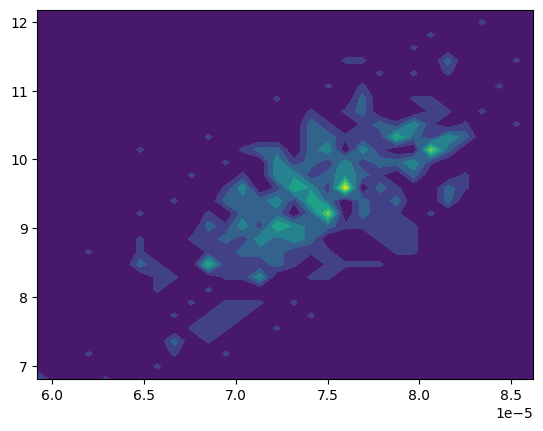

In [23]:
H2,binsx,binsy = np.histogram2d(omega,Gravedad,bins=(30,30))

plt.contourf(H2, aspect ='auto', extent=(omega.min(), omega.max(), Gravedad.min(), Gravedad.max()))

Es evidente que las variables estan correlacionadas, pues vemos una relacion creciente clara entre ambas variables, al aumentar coreolis, crece de manera aparente la gravedad medida. Debido a esto es necesario introducir el termino cubico de coreolis para modelar de manera adecuada el set de datos dado.

In [24]:
H1 = np.sum(H2,axis=1)
H1

array([ 3.,  1.,  3.,  3.,  4.,  5.,  5.,  2.,  9., 17., 15., 19., 23.,
       20., 24., 25., 20., 20., 22., 20., 13.,  7.,  5.,  3.,  3.,  5.,
        1.,  1.,  1.,  1.])

In [25]:
H2_ = np.sum(H2,axis=0)
H2_

array([ 2.,  0.,  0.,  2.,  1.,  0.,  6.,  4.,  6.,  4., 14., 14., 19.,
       17., 26., 18., 26., 23., 17., 20., 15., 14., 16., 12., 13.,  5.,
        2.,  1.,  2.,  1.])

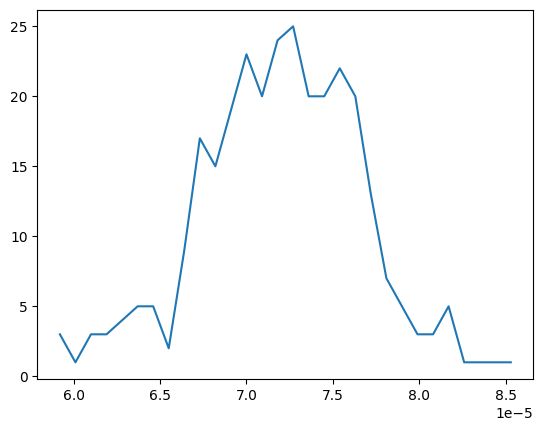

In [26]:
plt.plot(binsx[:-1],H1)

In [27]:
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )

In [28]:
binsx[[ij,ii,ji]]

array([6.37075622e-05, 7.27067212e-05, 8.17058801e-05])

Es claro que los datos presentados a continuacion difieren respecto a los presentados en la guia debido al muestreo que se realiza cada vez. Atendiendo a etso, el mejor estimador obtenido es :$\\$
$\bar{\omega}=7.27\times10^{-5} $

Y el intervalo de confianza a 1$\sigma$ es:
$IC_{68\%} = [6.37,8.17]\times10^{-5}$

In [29]:
ang = [10,20,30,40,50,60]
sols = []
confianzas = []
sigma_w = []
for i in range(len(ang)):
    DataF = data.loc[data['angle'] == ang[i]]
    H = DataF.h
    Theta = DataF.angle
    Y = DataF.y
    Sigma = DataF.sigmay
    
    Yarr = Y.values
    Sigmarr = Sigma.values
    Harr = H.values
    Thetarr = Theta.values
    
    omega = Omega(Harr,Yarr,Sigmarr,Thetarr,Gravedad)
    H2,binsx,binsy = np.histogram2d(omega,Gravedad,bins=(30,30))
    H1 = np.sum(H2,axis=1)
    cs = np.cumsum(H1)
    ij = np.searchsorted( cs, np.percentile(cs,16) )
    ii = np.searchsorted( cs, np.percentile(cs,50) )
    ji = np.searchsorted( cs, np.percentile(cs,84) )
    binsx[[ij,ii,ji]]
    sol = [ binsx[ii]]
    confianza =  [binsx[ij],binsx[ji]]
    sigma = (binsx[ji]-binsx[ij])/(binsx[ii]*2)
    sigma_w.append(sigma)
    confianzas.append(confianza)
    sols.append(sol)
    print(i)

for k in range(len(sols)):
    print(sols[k])
    print()
    print()
    

         Current function value: 5.732041
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 7.863285
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 9.528098
         Iterations: 2
         Function evaluations: 50
         Gradient evaluations: 19
         Current function value: 5.002259
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 6.445004
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 7.900927
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 9.615051
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 8.888066
         Iterations: 2
    

         Current function value: 7.048609
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 4.845017
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 5.512379
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 6.870073
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 9.521813
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 6.761437
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 12.357060
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value:

Optimization terminated successfully.
         Current function value: 2.262568
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 9.154045
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 6.742559
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value: 9.771802
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 6.147372
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 9.620461
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 5.736991
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value:

         Current function value: 8.574450
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 46
         Current function value: 5.093124
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 4.033648
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 9.588263
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 4.916382
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 5.356356
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 6.821863
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 9.387001
         Iterations: 2
   

         Current function value: 4.748015
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 7.398122
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 5.684683
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 5.060107
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 12.813762
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 3.835107
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value: 5.743945
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 9.806409
         Iterations: 2
  

         Current function value: 4.671469
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 4.211920
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 4.545279
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 2.167441
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 1.357204
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 4.717645
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 6.180978
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 2.017571
         Iterations: 2
    

         Current function value: 4.739777
         Iterations: 2
         Function evaluations: 52
         Gradient evaluations: 20
         Current function value: 4.729899
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 4.513019
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 4.348284
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 9.171294
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 7.462667
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 2.951026
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 

         Current function value: 8.428929
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 11.782101
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 3.045076
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 7.422803
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 9.589689
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 6.626273
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 1.852965
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value:

         Current function value: 3.629511
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 3.506506
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 5.488480
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 6.464161
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 10.326259
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 5.337429
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 8.274625
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 3.873147
         Iterations: 2
   

         Current function value: 4.904726
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 9.031780
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 13.325243
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.032723
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.367578
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 2.338432
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 3.005979
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value:

         Current function value: 2.858997
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 3.511680
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.427142
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.598830
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 1.341793
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.110367
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 6.759512
         Itera

         Current function value: 1.822955
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 3.603739
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.354341
         Iterations: 2
         Function evaluations: 52
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 3.134788
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.513726
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 5.573688
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.142498
         Itera

         Current function value: 8.002957
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 3.085945
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.490729
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 6.889292
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 3.733019
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 5.464803
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 4.769805
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
Optimization terminated successfu

         Current function value: 4.433984
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 2.682141
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 6.877523
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.163170
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 45
         Current function value: 2.008736
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 3.402469
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.237951
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations:

         Current function value: 1.920501
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 45
         Current function value: 2.271581
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 9.205079
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 2.896031
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.989839
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.431936
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current fu

         Current function value: 5.947187
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 2.891132
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 9.134618
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 6.259763
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 8.157118
         Iterations: 2
         Function evaluations: 112
         Gradient evaluations: 50
         Current function value: 4.286814
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 3.185586
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 5.943771
         Iterations: 2
   

         Current function value: 7.817370
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 5.942615
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 8.230776
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 4.014157
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 1.318174
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 3.964784
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 2.519731
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 6.694371
         Iterations: 2
    

         Current function value: 5.728151
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 2.219311
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 2.887140
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 7.302760
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 10.148808
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 5.566522
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 7.235256
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 3.068026
         Iterations: 2
   

         Current function value: 7.235661
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 5.072026
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 9.683307
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 6.845001
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 10.106576
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 4.056172
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 3.079057
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 46
         Current function value: 5.255033
         Iterations: 2
  

         Current function value: 4.031339
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 6.986321
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 5.175293
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 6.618162
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 2.870617
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 8.023962
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 3.763728
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 

         Current function value: 9.791442
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 3.681016
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 5.798198
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.760319
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.014376
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 4.371852
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.731955
         Iterations: 2
         Function evaluations

Optimization terminated successfully.
         Current function value: 6.468548
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.409607
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.402880
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.978944
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 6.766250
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 10.110335
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
Optimization terminated successfully.
         Current fu

         Current function value: 3.309153
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 6.457414
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 2.347809
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.917233
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.851028
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 18.410868
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminat

         Current function value: 4.972552
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 4.805758
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 13.893767
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 4.949215
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 2.773911
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.466406
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 9.348640
         Iterat

Optimization terminated successfully.
         Current function value: 1.796872
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 7.496873
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.625206
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 4.148962
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 9.705434
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 2.119086
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 5.182037
         Iterations: 2
         Function evaluations

         Current function value: 2.017456
         Iterations: 2
         Function evaluations: 52
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 6.323219
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.935433
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 8.177778
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.034418
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.160749
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 1.788750
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 

         Current function value: 4.719703
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 4.579644
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.156168
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value: 6.630031
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.575343
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 3.807151
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 7.961848
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations:

         Current function value: 2.806528
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 4.657505
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.711366
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 6.603998
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 4.328274
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.449552
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 6.989453
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 

         Current function value: 3.091876
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 5.065566
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 6.730022
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 7.461335
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 3.380734
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 2.528403
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 8.766310
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 7.148995
         Iterations: 2
    

In [30]:
DataF = data
H = DataF.h
Theta = DataF.angle
Y = DataF.y
Sigma = DataF.sigmay

Yarr = Y.values
Sigmarr = Sigma.values
Harr = H.values
Thetarr = Theta.values

omega = Omega(Harr,Yarr,Sigmarr,Thetarr,Gravedad)
H2,binsx,binsy = np.histogram2d(omega,Gravedad,bins=(30,30))
H1 = np.sum(H2,axis=1)
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )
binsx[[ij,ii,ji]]
sol = [ binsx[ii]]
confianza =  [binsx[ij],binsx[ji]]
confianzas.append(confianza)
sols.append(sol)
sigma = (binsx[ji]-binsx[ij])/(binsx[ii]*2)
sigma_w.append(sigma)
sol

Optimization terminated successfully.
         Current function value: 32.513747
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 34.335896
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 38.156960
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value: 42.910937
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 38.648989
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 50.846664
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 41.968106
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function

         Current function value: 27.899668
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 44.500246
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 33.709565
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 51.853622
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 41.412963
         Iterations: 2
         Function evaluations: 50
         Gradient evaluations: 19
         Current function value: 34.300375
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 39.988521
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function 

         Current function value: 35.087082
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 44.410974
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 39.777861
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 26.538161
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 35.784381
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 37.756910
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 32.333032
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 47.345391
         Iterations

         Current function value: 42.570191
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 39.866995
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 45.991007
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 50.781872
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 33.038601
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 33.846532
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 28.532150
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function 

         Current function value: 38.214679
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 36.300815
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 35.333087
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 45.156676
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 71.820053
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 44.408678
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 44.413227
         Iterations: 3
         Function evaluations: 8
         Gradient evalu

[7.049071809460839e-05]

In [31]:
dataFinal = {
    "lambda" : [10,20,30,40,50,60,"combinado"],
    "omega" : sols,
    "intervalo_de_confianza 68%" : confianzas,
    "Error relativo" : sigma_w
    
}

In [32]:
df = pd.DataFrame(dataFinal)

df


,lambda,omega,intervalo_de_confianza 68%,Error relativo
0,10,[6.968488482004577e-05],"[6.097235124591082e-05, 7.839741839418071e-05]",0.125028
1,20,[7.186037512754099e-05],"[6.348589373566186e-05, 8.023485651942012e-05]",0.116538
2,30,[7.27222758006513e-05],"[6.485729558855311e-05, 7.980075799153968e-05]",0.102743
3,40,[7.379148095418617e-05],"[6.446369158437468e-05, 8.311927032399763e-05]",0.126407
4,50,[6.825913412387489e-05],"[5.8862711830506384e-05, 7.765555641724339e-05]",0.137658
5,60,[7.430693834498559e-05],"[6.231171733644524e-05, 8.630215935352594e-05]",0.161428
6,combinado,[7.049071809460839e-05],"[6.305675636288696e-05, 7.792467982632983e-05]",0.105460


[[6.097235124591082e-05, 7.839741839418071e-05], [6.348589373566186e-05, 8.023485651942012e-05], [6.485729558855311e-05, 7.980075799153968e-05], [6.446369158437468e-05, 8.311927032399763e-05], [5.8862711830506384e-05, 7.765555641724339e-05], [6.231171733644524e-05, 8.630215935352594e-05], [6.305675636288696e-05, 7.792467982632983e-05]]


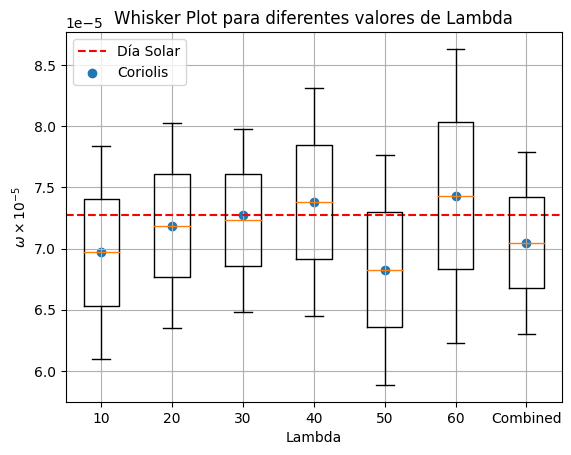

In [33]:
lambda_values = [10,20,30,40,50,60,"Combined"]
data = []
for i in range(len(lambda_values)):
    ci = confianzas[i]
    data.append([ci[0], ci[1]])
print(data)
om = df.omega.values.tolist()
omar = []
for sublist in om:
    for item in sublist:
        omar.append(item)
        
        
plt.axhline(y = 7.27E-5, color = 'r', linestyle = '--', label='Día Solar')
plt.scatter(range(1, len(lambda_values) + 1),omar, label='Coriolis')
    
plt.boxplot(data)

plt.xticks(range(1, len(lambda_values) + 1), lambda_values)
plt.xlabel('Lambda')
plt.ylabel(r'$\omega \times10^{-5}$')
plt.title('Whisker Plot para diferentes valores de Lambda')
plt.grid(True)
plt.legend()


plt.show()